# Introduction

This project explores and analyzes a New York City Airbnb dataset. It involves data cleaning, exploratory data analysis, geospatial visualization, and price distribution analysis. The code aims to gain insights into the Airbnb listings in NYC, such as the number of listings by room type and neighborhood, the spatial distribution of listings across boroughs, and the relationship between price and geographical location. The code utilizes popular data analysis libraries such as Pandas, Seaborn, Matplotlib, and Geopandas to perform these tasks. 

# Data Loading and Overview

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# Renaming the 'neighbourhood_group' column to 'borough' 
data.rename(columns = {'neighbourhood_group':'borough'}, inplace = True)
data.head()

,id,name,host_id,host_name,borough,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   borough                         48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
borough                               0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
# Cleaning the data by dropping NA Values
data.dropna(inplace=True)
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
borough                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Price Distribution

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Figure size 1000x1000 with 0 Axes>

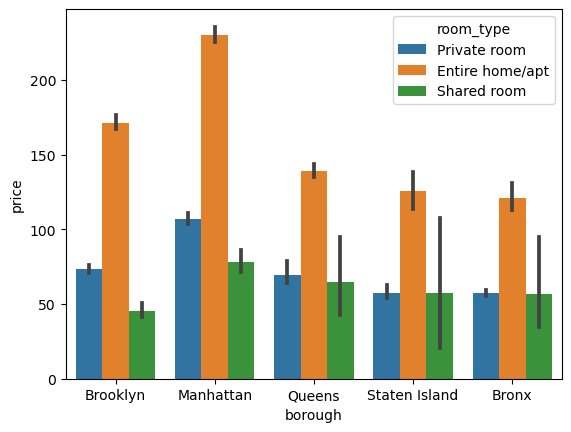

<Figure size 1000x1000 with 0 Axes>

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a bar chart comparing average prices by room type and neighborhood group
sns.barplot(x = 'borough', y = 'price', hue = 'room_type', data = data)
plt.figure(figsize = (10, 10))

For the most part, the average prices for Airbnb's in Manhattan and Brooklyn seem to be above the other boroughs with the price of an Entire Home/Apt in Manhattan averaging the highest cost.  

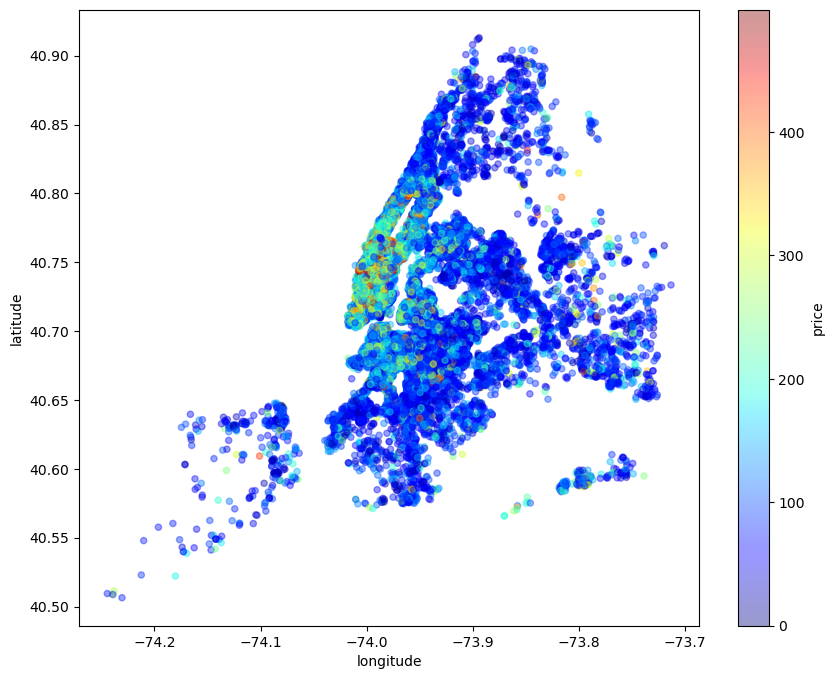

In [9]:
avaibility = data[data.price < 500].plot(kind = 'scatter', x = 'longitude', y = 'latitude', c = 'price', cmap = plt.get_cmap('jet'), colorbar = True, alpha = 0.4, figsize = (10,8))

We can see that prices are higher-cost listings are centralized in Manhattan and along the ocean.
It is possible that the landscape and nature factors are also effective in the price increase on the ocean sides.

# Listings Distribution

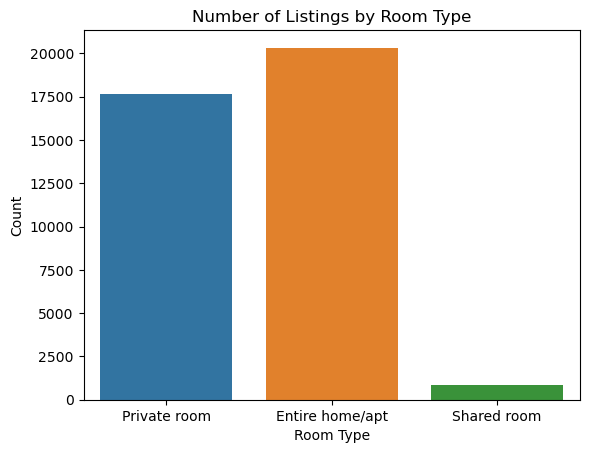

In [10]:
# Counting the number of listings by room type and plot on bar chart
sns.countplot(x = 'room_type', data = data)
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Number of Listings by Room Type')
plt.show()

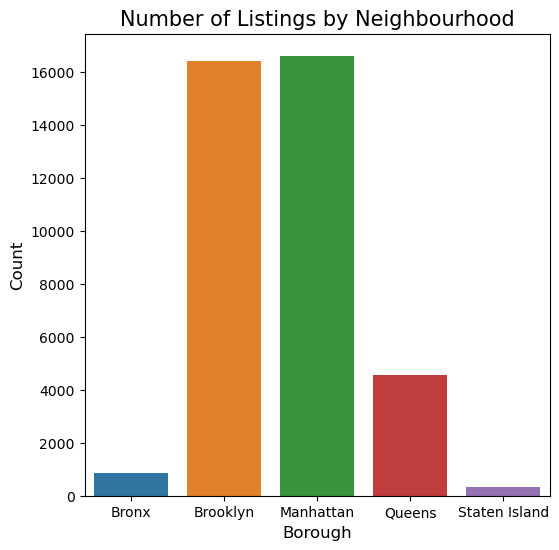

In [11]:
# Group the dataset by borough and count the number of listings
borough_count = data.groupby('borough').agg('count').reset_index()

# Plotting a bar chart showing the number of listings by neighborhood
fig, ax1 = plt.subplots(1,1, figsize = (6,6))
sns.barplot(x = 'borough', y = 'id', data = borough_count, ax = ax1)

ax1.set_title('Number of Listings by Neighbourhood', fontsize = 15)
ax1.set_xlabel('Borough', fontsize = 12)
ax1.set_ylabel('Count', fontsize = 12)
ax1.tick_params(axis = 'both', labelsize = 10)

We can see that Manhattan and Brooklyn hold a large majority of the listings of Airbnb's in New York City. This can be attributed to the many tourist attractions, business centers, and cultural events in the two boroughs. Going back to the previous bar chart comparing average prices by room type and neighborhood group, it is evident that the demand for Airbnb's Manhattan and Brooklyn are what drive the average price and number of listings up. 